# Trabajo Práctico 1
### Alumnos:
#### Patricio Avigliano, 98861
#### Kevin Cajachuán, 98725
#### Guillermo Condori, 98688
#### Pablo Torres Marín



Link al repositorio: https://github.com/Kajachuan/RepoDatos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('properati_data.csv', low_memory=False)

In [3]:
#analizamos los tipos de las columnas
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973870 entries, 0 to 973869
Data columns (total 20 columns):
id                            266523 non-null object
created_on                    973870 non-null object
property_type                 973870 non-null object
place_with_parent_names       973870 non-null object
geonames_id                   800882 non-null float64
lat                           731716 non-null float64
lon                           731711 non-null float64
price                         862639 non-null float64
currency                      857625 non-null object
price_aprox_local_currency    862637 non-null float64
price_aprox_usd               862637 non-null float64
surface_in_m2                 458459 non-null float64
surface_total_in_m2           249607 non-null float64
surface_covered_in_m2         303352 non-null float64
price_usd_per_m2              585363 non-null float64
price_per_m2                  271100 non-null float64
floor                         

In [4]:
#Vemos cuantos datos faltan en cada columna
data.isnull().sum()

id                            707347
created_on                         0
property_type                      0
place_with_parent_names            0
geonames_id                   172988
lat                           242154
lon                           242159
price                         111231
currency                      116245
price_aprox_local_currency    111233
price_aprox_usd               111233
surface_in_m2                 515411
surface_total_in_m2           724263
surface_covered_in_m2         670518
price_usd_per_m2              388507
price_per_m2                  702770
floor                         790898
rooms                         397319
expenses                      920689
description                   296630
dtype: int64

## ¿Cuántas propiedades hay de cada tipo?

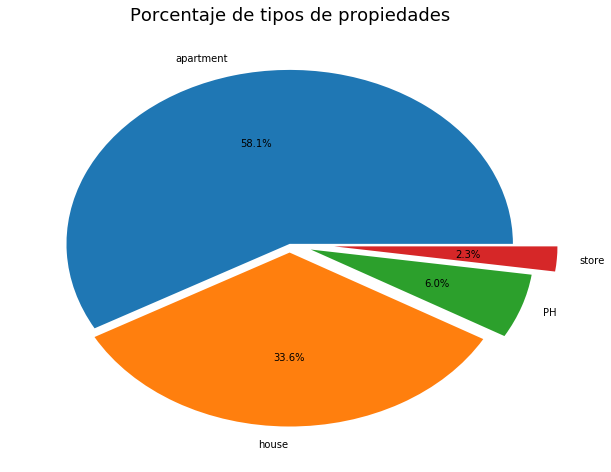

In [5]:
tipos = data['property_type'].value_counts()
plt.figure(figsize=(10, 8))
plt.title('Porcentaje de tipos de propiedades', fontsize = 18)
plt.pie(tipos, labels=tipos.keys(), autopct='%1.1f%%', explode=(0, .05, .10, .20))
plt.ylabel('')

Observamos que la mayoria de los registros publicados corresponden a departamentos y casas.

## ¿Cuántas propiedades publicadas hay en cada zona?

In [6]:
location=data['place_with_parent_names'].value_counts()
tagsCount={}
for key in location.keys():
    aux=key.split('|')
    aux=aux[1:-1]
    for tag in aux:
        tagsCount[tag]=tagsCount.get(tag,0)+location[key]
tagsCount.pop('')
tagsCount.pop('Argentina')
tagsCount['Country Maschwitz Club']=tagsCount.pop(' Country Maschwitz Club')
tagsCount['los alamos']=tagsCount.pop(' los alamos')
capitalYGB={}
capitalYGB['Capital Federal']=tagsCount.pop('Capital Federal')
capitalYGB['Bs.As. G.B.A. Zona Norte']=tagsCount.pop('Bs.As. G.B.A. Zona Norte')
capitalYGB['Bs.As. G.B.A. Zona Sur']=tagsCount.pop('Bs.As. G.B.A. Zona Sur')
capitalYGB['Bs.As. G.B.A. Zona Oeste']=tagsCount.pop('Bs.As. G.B.A. Zona Oeste')

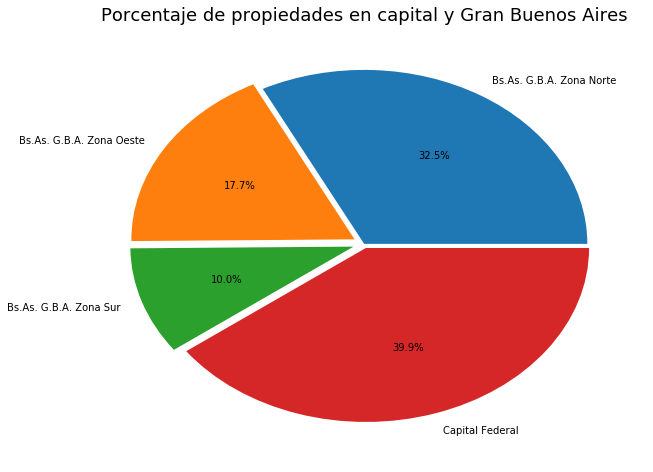

In [7]:
zona = pd.Series(capitalYGB, name='Zona')
zona.index.name = 'Lugar'
zona.reset_index()
plt.figure(figsize=(10, 8))
plt.title('Porcentaje de propiedades en capital y Gran Buenos Aires', fontsize = 18)
plt.pie(zona, labels=zona.keys(), autopct='%1.1f%%', explode=(0, .05, .05, .025))
plt.ylabel('')

## ¿Cuántas propiedades publicadas hay en cada localidad?

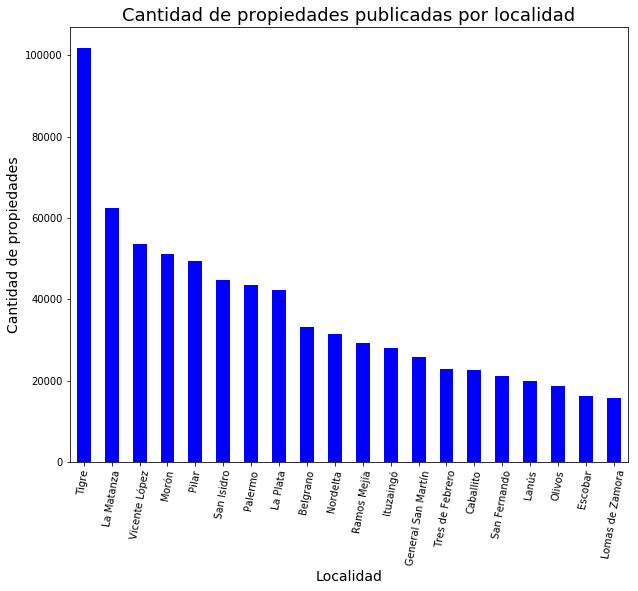

In [8]:
tagsRelevantes={}
for key in tagsCount:
    if tagsCount[key]>15500:
        tagsRelevantes[key]=tagsCount[key]
rel = pd.Series(tagsRelevantes, name='Cantidad')
rel.index.name = 'Barrio'
rel.reset_index()
rel.sort_values(ascending = False).plot(kind = 'bar', rot = 80, figsize = (10, 8), color = 'blue')
plt.title('Cantidad de propiedades publicadas por localidad', fontsize = 18)
plt.xlabel('Localidad', fontsize = 14)
plt.ylabel('Cantidad de propiedades', fontsize = 14)

## ¿Cuál es el precio promedio de todas las propiedades en cada localidad?

In [9]:
dataPorLocation={}
housePorLocation={}
storePorLocation={}
phPorLocation={}
apartmentPorLocation={}
for location in tagsRelevantes:
    dataPorLocation[location]=data[data.place_with_parent_names.str.contains(location)]
    housePorLocation[location]=dataPorLocation[location][dataPorLocation[location].property_type=='house']
    storePorLocation[location]=dataPorLocation[location][dataPorLocation[location].property_type=='store']
    apartmentPorLocation[location]=dataPorLocation[location][dataPorLocation[location].property_type=='apartment']
    phPorLocation[location]=dataPorLocation[location][dataPorLocation[location].property_type=='PH']

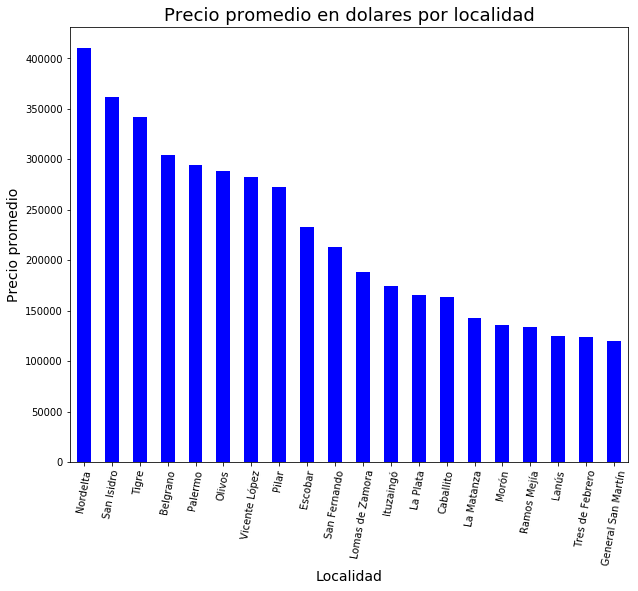

In [10]:
meanPriceUsdPorLocation={}
for location in dataPorLocation:
    meanPriceUsdPorLocation[location]=dataPorLocation[location]['price_aprox_usd'].mean()
mPrice = pd.Series(meanPriceUsdPorLocation, name='Precio promedio')
mPrice.index.name = 'Barrio'
mPrice.reset_index()
mPrice.sort_values(ascending = False).plot(kind = 'bar', rot = 80, figsize = (10, 8), color = 'blue')
plt.title('Precio promedio en dolares por localidad', fontsize = 18)
plt.xlabel('Localidad', fontsize = 14)
plt.ylabel('Precio promedio', fontsize = 14)

## ¿Cuál es el desvío estandar de todas las propiedades en cada localidad?

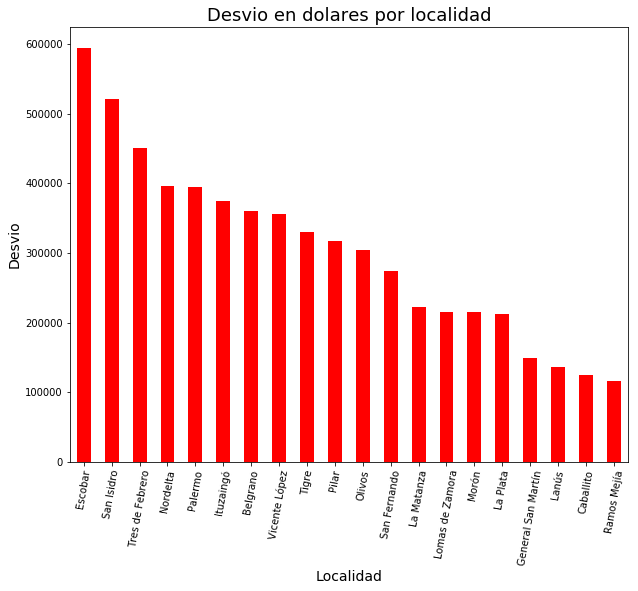

In [11]:
varPriceUsdPorLocation={}
for location in dataPorLocation:
    varPriceUsdPorLocation[location]=dataPorLocation[location]['price_aprox_usd'].std()
vPrice = pd.Series(varPriceUsdPorLocation, name='Precio promedio')
vPrice.index.name = 'Barrio'
vPrice.reset_index()
vPrice.sort_values(ascending = False).plot(kind = 'bar', rot = 80, figsize = (10, 8), color = 'red')
plt.title('Desvio en dolares por localidad', fontsize = 18)
plt.xlabel('Localidad', fontsize = 14)
plt.ylabel('Desvio', fontsize = 14)

## ¿Cuál es el precio promedio de las casas en cada localidad?

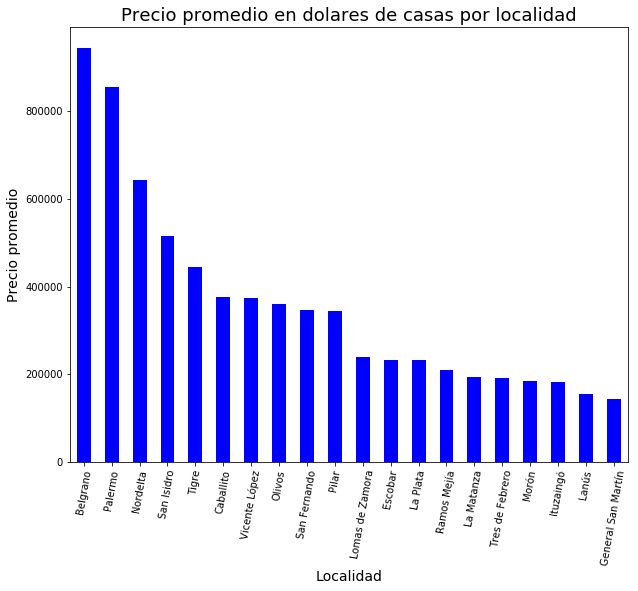

In [12]:
#medias de precio de casas por barrio
meanHousePriceUsdPorLocation={}
for location in housePorLocation:
    meanHousePriceUsdPorLocation[location]=housePorLocation[location]['price_aprox_usd'].mean()
mHPrice = pd.Series(meanHousePriceUsdPorLocation, name='Precio promedio')
mHPrice.index.name = 'Barrio'
mHPrice.reset_index()
mHPrice.sort_values(ascending = False).plot(kind = 'bar', rot = 80, figsize = (10, 8), color = 'blue')
plt.title('Precio promedio en dolares de casas por localidad', fontsize = 18)
plt.xlabel('Localidad', fontsize = 14)
plt.ylabel('Precio promedio', fontsize = 14)

## ¿Cuál es el desvío estandar de las casas en cada localidad?

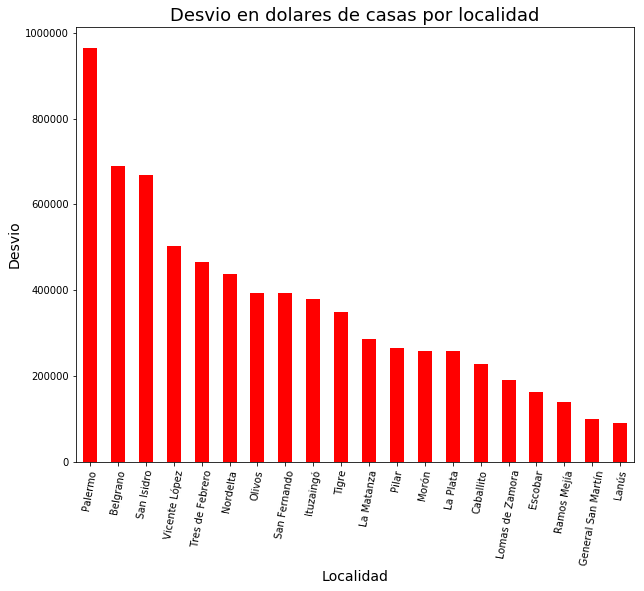

In [13]:
varHousePriceUsdPorLocation={}
for location in housePorLocation:
    varHousePriceUsdPorLocation[location]=housePorLocation[location]['price_aprox_usd'].std()
vHPrice = pd.Series(varHousePriceUsdPorLocation, name='Precio promedio')
vHPrice.index.name = 'Barrio'
vHPrice.reset_index()
vHPrice.sort_values(ascending = False).plot(kind = 'bar', rot = 80, figsize = (10, 8), color = 'red')
plt.title('Desvio en dolares de casas por localidad', fontsize = 18)
plt.xlabel('Localidad', fontsize = 14)
plt.ylabel('Desvio', fontsize = 14)

## ¿Cuál es el precio promedio de los locales en cada localidad?

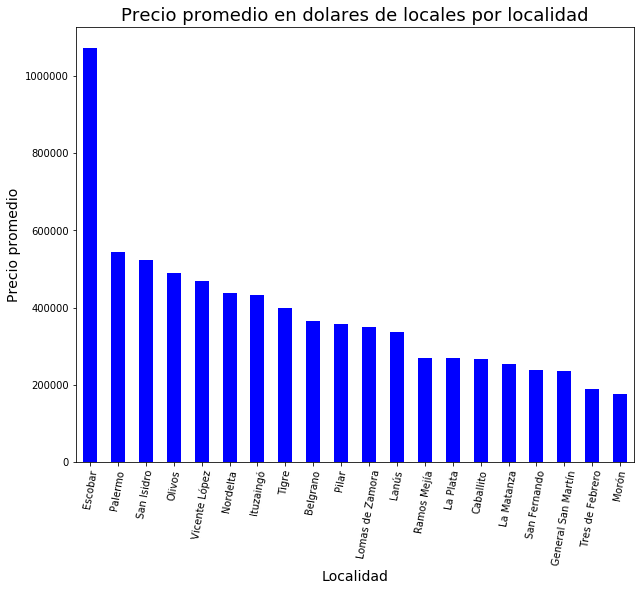

In [14]:
meanStorePriceUsdPorLocation={}
for location in storePorLocation:
    meanStorePriceUsdPorLocation[location]=storePorLocation[location]['price_aprox_usd'].mean()
mSPrice = pd.Series(meanStorePriceUsdPorLocation, name='Precio promedio')
mSPrice.index.name = 'Barrio'
mSPrice.reset_index()
mSPrice.sort_values(ascending = False).plot(kind = 'bar', rot = 80, figsize = (10, 8), color = 'blue')
plt.title('Precio promedio en dolares de locales por localidad', fontsize = 18)
plt.xlabel('Localidad', fontsize = 14)
plt.ylabel('Precio promedio', fontsize = 14)

## ¿Cuál es el desvío estandar de los locales en cada localidad?

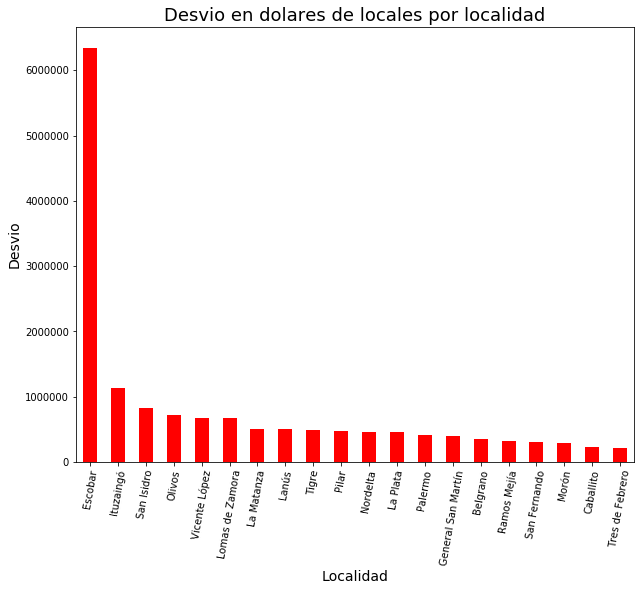

In [15]:
varStorePriceUsdPorLocation={}
for location in storePorLocation:
    varStorePriceUsdPorLocation[location]=storePorLocation[location]['price_aprox_usd'].std()
vSPrice = pd.Series(varStorePriceUsdPorLocation, name='Precio promedio')
vSPrice.index.name = 'Barrio'
vSPrice.reset_index()
vSPrice.sort_values(ascending = False).plot(kind = 'bar', rot = 80, figsize = (10, 8), color = 'red')
plt.title('Desvio en dolares de locales por localidad', fontsize = 18)
plt.xlabel('Localidad', fontsize = 14)
plt.ylabel('Desvio', fontsize = 14)

## ¿Cuál es el precio promedio de los PH en cada localidad?

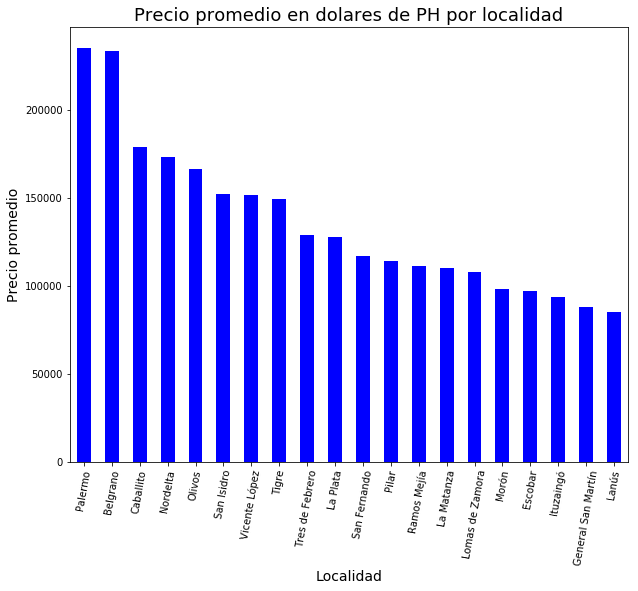

In [16]:
meanPhPriceUsdPorLocation={}
for location in phPorLocation:
    meanPhPriceUsdPorLocation[location]=phPorLocation[location]['price_aprox_usd'].mean()
mPHPrice = pd.Series(meanPhPriceUsdPorLocation, name='Precio promedio')
mPHPrice.index.name = 'Barrio'
mPHPrice.reset_index()
mPHPrice.sort_values(ascending = False).plot(kind = 'bar', rot = 80, figsize = (10, 8), color = 'blue')
plt.title('Precio promedio en dolares de PH por localidad', fontsize = 18)
plt.xlabel('Localidad', fontsize = 14)
plt.ylabel('Precio promedio', fontsize = 14)

## ¿Cuál es el desvío estandar de los PH en cada localidad?

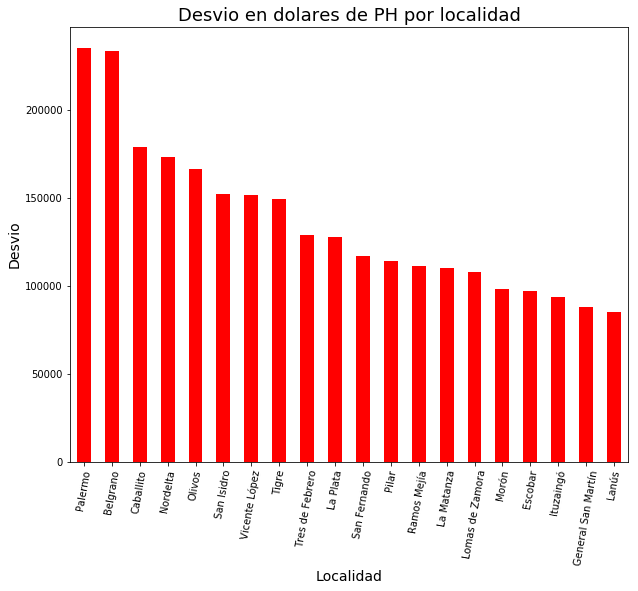

In [17]:
varPhPriceUsdPorLocation={}
for location in phPorLocation:
    varPhPriceUsdPorLocation[location]=phPorLocation[location]['price_aprox_usd'].std()
vPHPrice = pd.Series(meanPhPriceUsdPorLocation, name='Precio promedio')
vPHPrice.index.name = 'Barrio'
vPHPrice.reset_index()
vPHPrice.sort_values(ascending = False).plot(kind = 'bar', rot = 80, figsize = (10, 8), color = 'red')
plt.title('Desvio en dolares de PH por localidad', fontsize = 18)
plt.xlabel('Localidad', fontsize = 14)
plt.ylabel('Desvio', fontsize = 14)

## ¿Cuál es el precio promedio de los departamentos en cada localidad?

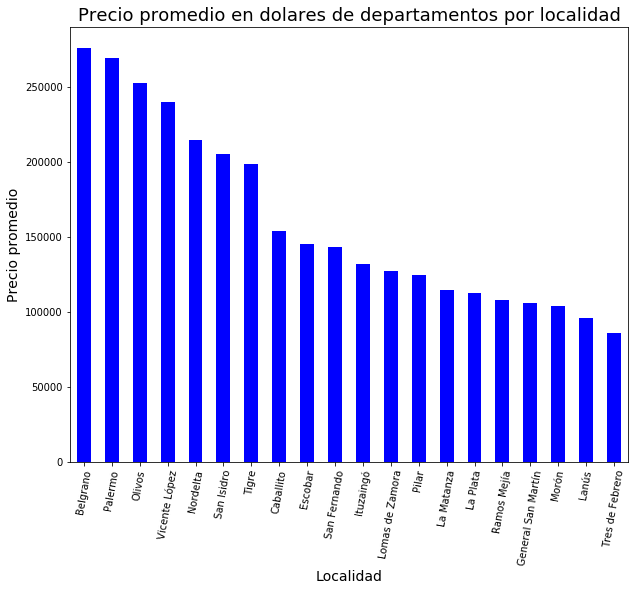

In [18]:
meanApartmentPriceUsdPorLocation={}
for location in apartmentPorLocation:
    meanApartmentPriceUsdPorLocation[location]=apartmentPorLocation[location]['price_aprox_usd'].mean()
mAPrice = pd.Series(meanApartmentPriceUsdPorLocation, name='Precio promedio')
mAPrice.index.name = 'Barrio'
mAPrice.reset_index()
mAPrice.sort_values(ascending = False).plot(kind = 'bar', rot = 80, figsize = (10, 8), color = 'blue')
plt.title('Precio promedio en dolares de departamentos por localidad', fontsize = 18)
plt.xlabel('Localidad', fontsize = 14)
plt.ylabel('Precio promedio', fontsize = 14)

## ¿Cuál es el desvío estandar de los departamentos en cada localidad?

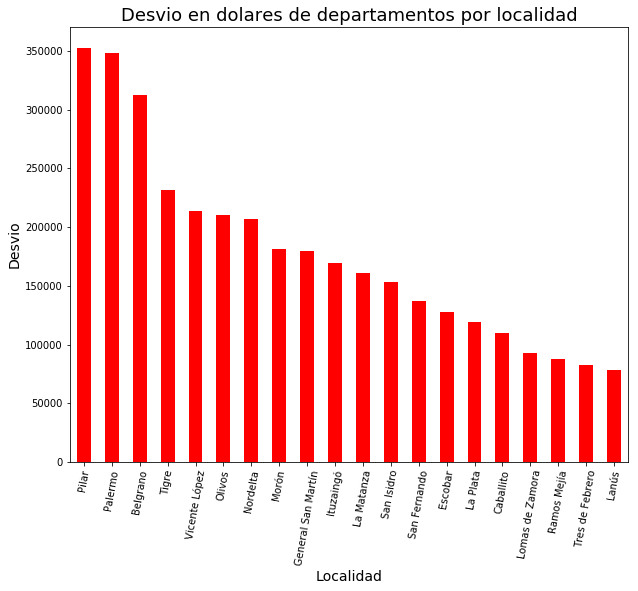

In [19]:
varApartmentPriceUsdPorLocation={}
for location in apartmentPorLocation:
    varApartmentPriceUsdPorLocation[location]=apartmentPorLocation[location]['price_aprox_usd'].std()
vAPrice = pd.Series(varApartmentPriceUsdPorLocation, name='Desvio')
vAPrice.index.name = 'Barrio'
vAPrice.reset_index()
vAPrice.sort_values(ascending = False).plot(kind = 'bar', rot = 80, figsize = (10, 8), color = 'red')
plt.title('Desvio en dolares de departamentos por localidad', fontsize = 18)
plt.xlabel('Localidad', fontsize = 14)
plt.ylabel('Desvio', fontsize = 14)

El grafico muestra que tanto varian los precios de los departamentos en cada localidad, siendo Lanus donde los departamentos tienen un precio más similar entre ellos.

## ¿Cuántas publicaciones se realizaron en cada año?

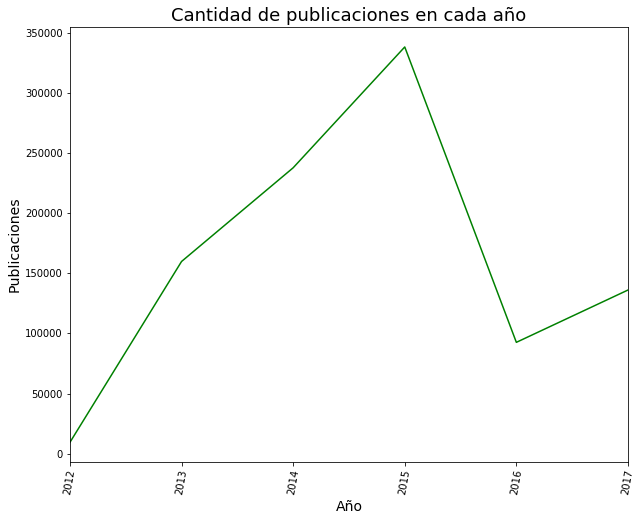

In [20]:
dates=data['created_on']
yearsCount={}
monthsCount={}
daysCount={}
for date in dates:
    aux=date.split('-')
    yearsCount[aux[0]]=yearsCount.get(aux[0],0)+1
    monthsCount[aux[1]]=monthsCount.get(aux[1],0)+1
    daysCount[aux[2]]=daysCount.get(aux[2],0)+1
 #cuantos registros fueron publicados en cada año
y = pd.Series(yearsCount, name='Cantidad')
y.index.name = 'Año'
y.reset_index()
y.plot(kind = 'line', rot = 80, figsize = (10, 8), color = 'green')
plt.title('Cantidad de publicaciones en cada año', fontsize = 18)
plt.xlabel('Año', fontsize = 14)
plt.ylabel('Publicaciones', fontsize = 14)

## ¿Cuántas publicaciones se realizaron en cada mes?

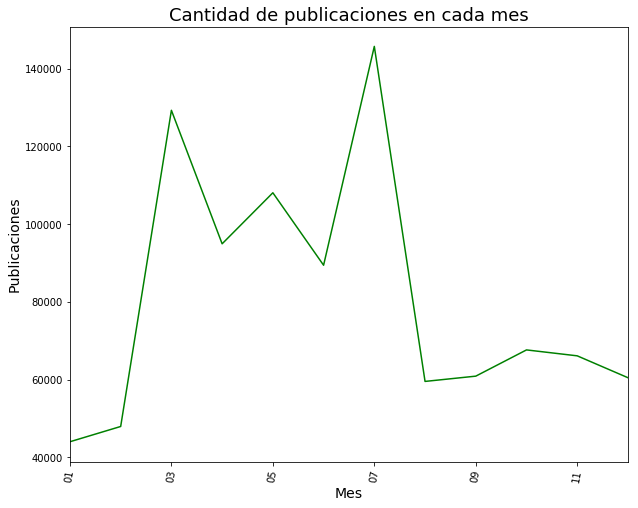

In [21]:
  #cuantos registros fueron publicados en cada mes del año
m = pd.Series(monthsCount, name='Cantidad')
m.index.name = 'Año'
m.reset_index()
m.plot(kind = 'line', rot = 80, figsize = (10, 8), color = 'green')
plt.title('Cantidad de publicaciones en cada mes', fontsize = 18)
plt.xlabel('Mes', fontsize = 14)
plt.ylabel('Publicaciones', fontsize = 14)

## ¿Cuántas publicaciones se realizaron en cada dia?

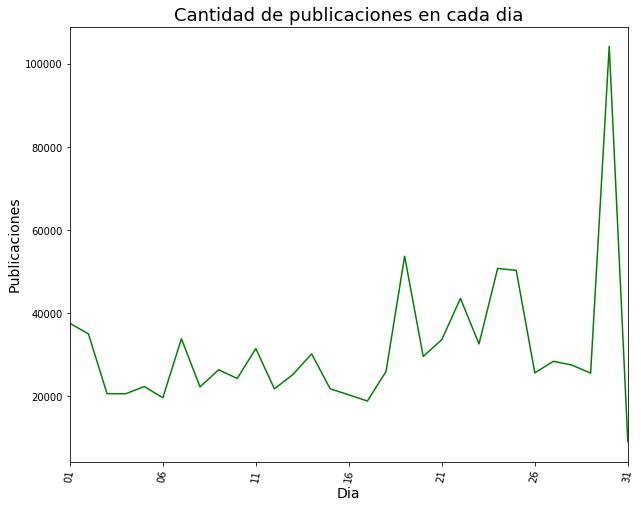

In [22]:
   #cuantos registros fueron publicados en cada dia del mes
d = pd.Series(daysCount, name='Cantidad')
d.index.name = 'Año'
d.reset_index()
d.plot(kind = 'line', rot = 80, figsize = (10, 8), color = 'green')
plt.title('Cantidad de publicaciones en cada dia', fontsize = 18)
plt.xlabel('Dia', fontsize = 14)
plt.ylabel('Publicaciones', fontsize = 14)

## ¿Depende el precio de la propiedad de la cantidad de habitaciones?

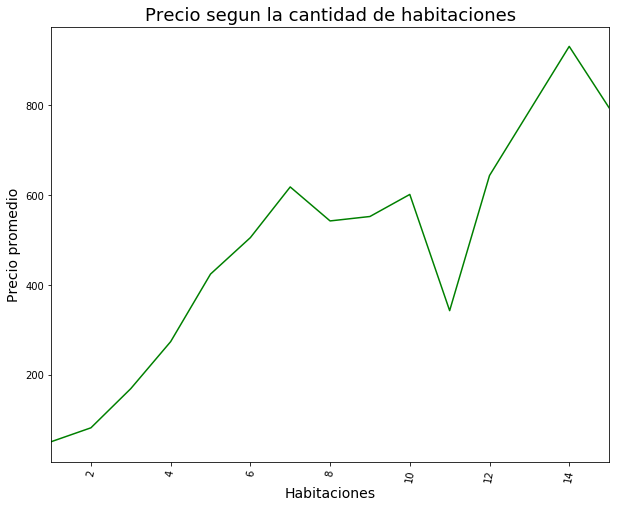

In [23]:
dataPorRooms=data[data.rooms.isnull()==False]
dataPorRooms=dataPorRooms[dataPorRooms.rooms!=0]
dataPorRooms=dataPorRooms[dataPorRooms.rooms<=15]
dataPorRooms=dataPorRooms[dataPorRooms.property_type!='store']
dataPorRooms=dataPorRooms[dataPorRooms.surface_in_m2.isnull()==False]
dataPorRooms=dataPorRooms.groupby('rooms')
dPR = dataPorRooms['surface_in_m2'].mean()
dPR.plot(kind = 'line', rot = 80, figsize = (10, 8), color = 'green')
plt.title('Precio segun la cantidad de habitaciones', fontsize = 18)
plt.xlabel('Habitaciones', fontsize = 14)
plt.ylabel('Precio promedio', fontsize = 14)

Vemos que a medida que una propiedad tiene un mayor numero de habitaciones su precio en promedio tiende a subir.

## ¿En qué localidades están las casas mas grandes?

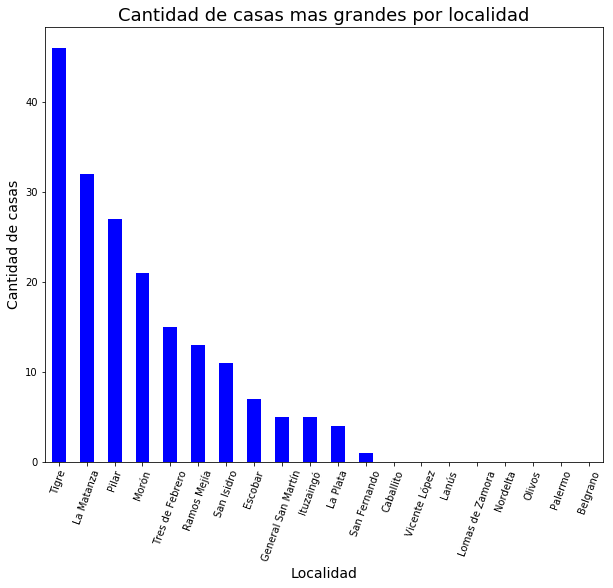

In [24]:
bigHousePorLocation={}
for location in housePorLocation:
        bigHousePorLocation[location]=len(housePorLocation[location][housePorLocation[location].surface_in_m2>10000])
tot=0
for location in bigHousePorLocation:
    tot+=bigHousePorLocation[location]

bh=pd.Series(bigHousePorLocation, name='%')
bh.index.name = 'Barrio'
bh.reset_index()
bh.sort_values(ascending = False).plot(kind = 'bar', rot = 70, figsize = (10, 8), color = 'blue')
plt.title('Cantidad de casas mas grandes por localidad', fontsize = 18)
plt.xlabel('Localidad', fontsize = 14)
plt.ylabel('Cantidad de casas', fontsize = 14)

Podemos observar que no existen registros de grandes terrenos en barrios como Palermo, Belgrano o Caballito, mientras que en zonas menos urbanizadas por ejemplo Tigre si los hay.

## ¿En qué localidades están las casas mas chicas?

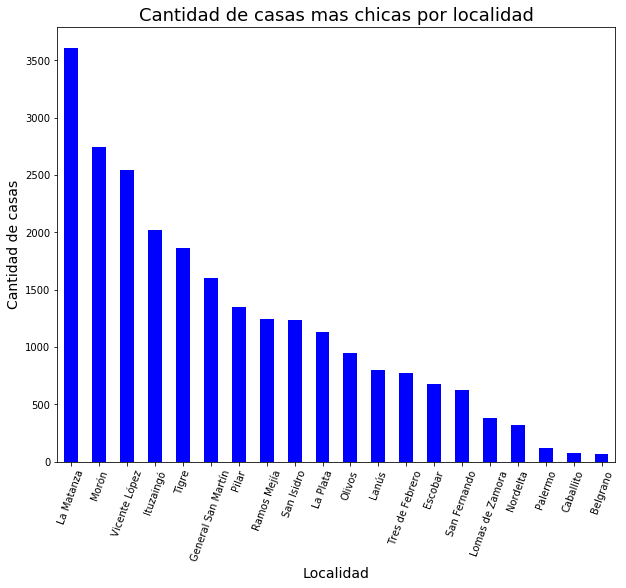

In [25]:
smallHousePorLocation={}
for location in housePorLocation:
        smallHousePorLocation[location]=housePorLocation[location][housePorLocation[location].surface_in_m2!=0]
        smallHousePorLocation[location]=len(smallHousePorLocation[location][smallHousePorLocation[location].surface_in_m2<150])
tot=0
for location in smallHousePorLocation:
    tot+=smallHousePorLocation[location]

sh=pd.Series(smallHousePorLocation, name='%')
sh.index.name = 'Barrio'
sh.reset_index()
sh.sort_values(ascending = False).plot(kind = 'bar', rot = 70, figsize = (10, 8), color = 'blue')
plt.title('Cantidad de casas mas chicas por localidad', fontsize = 18)
plt.xlabel('Localidad', fontsize = 14)
plt.ylabel('Cantidad de casas', fontsize = 14)

## ¿En qué localidades están los departamentos mas grandes?

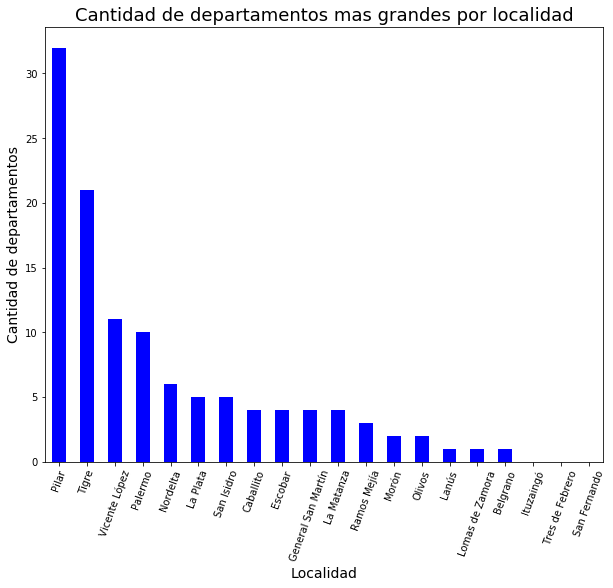

In [26]:
bigApartPorLocation={}
for location in apartmentPorLocation:
        bigApartPorLocation[location]=len(apartmentPorLocation[location][apartmentPorLocation[location].surface_in_m2>1000])
tot=0
for location in bigApartPorLocation:
    tot+=bigApartPorLocation[location]
    
ba=pd.Series(bigApartPorLocation, name='%')
ba.index.name = 'Barrio'
ba.reset_index()
ba.sort_values(ascending = False).plot(kind = 'bar', rot = 70, figsize = (10, 8), color = 'blue')
plt.title('Cantidad de departamentos mas grandes por localidad', fontsize = 18)
plt.xlabel('Localidad', fontsize = 14)
plt.ylabel('Cantidad de departamentos', fontsize = 14)

## ¿En qué localidades están los departamentos mas chicos?

/home/pato/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


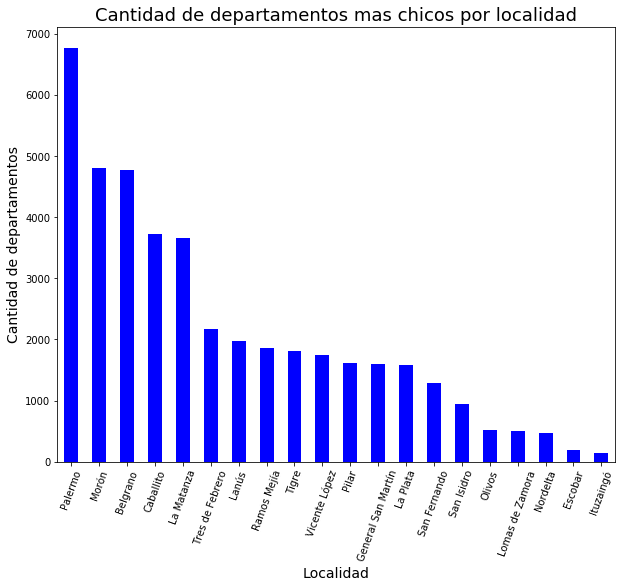

In [27]:
smallApartPorLocation={}
for location in apartmentPorLocation:
        smallApartPorLocation[location]=apartmentPorLocation[location][apartmentPorLocation[location].surface_in_m2!=0]
        smallApartPorLocation[location]=len(smallApartPorLocation[location][apartmentPorLocation[location].surface_in_m2<50])
tot=0
for location in smallApartPorLocation:
    tot+=smallApartPorLocation[location]
    
sa=pd.Series(smallApartPorLocation, name='%')
sa.index.name = 'Barrio'
sa.reset_index()
sa.sort_values(ascending = False).plot(kind = 'bar', rot = 70, figsize = (10, 8), color = 'blue')
plt.title('Cantidad de departamentos mas chicos por localidad', fontsize = 18)
plt.xlabel('Localidad', fontsize = 14)
plt.ylabel('Cantidad de departamentos', fontsize = 14)

En este gráfico vemos que Barrios como Palermo, Belgrano o Caballito tienen una gran tasa de departamentos pequeños.

## ¿Cuántos locales hay en cada localidad?

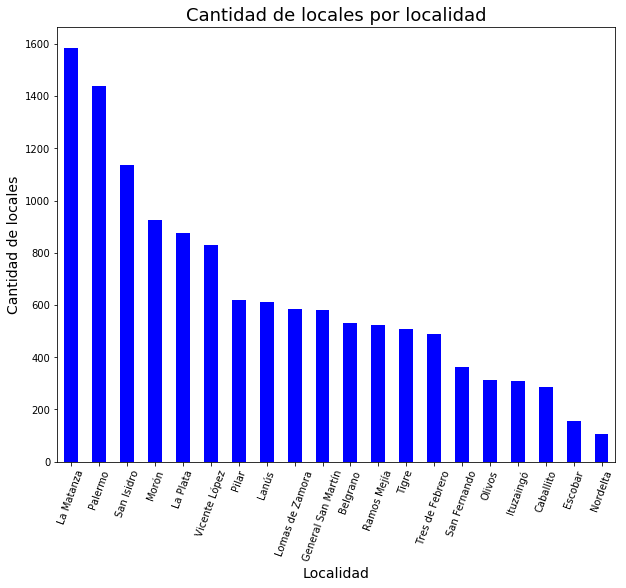

In [28]:
storeCountPorLocation={}
tot=0
for location in storePorLocation:
    storeCountPorLocation[location]=storePorLocation[location]['property_type'].count()
    tot+=storeCountPorLocation[location]
st=pd.Series(storeCountPorLocation, name='%')
st.index.name = 'Barrio'
st.reset_index()
st.sort_values(ascending = False).plot(kind = 'bar', rot = 70, figsize = (10, 8), color = 'blue')
plt.title('Cantidad de locales por localidad', fontsize = 18)
plt.xlabel('Localidad', fontsize = 14)
plt.ylabel('Cantidad de locales', fontsize = 14)